In [389]:
import numpy as np
from matplotlib import pyplot as plt #this is the traditional method
from statistics import stdev
from matplotlib.legend_handler import HandlerLine2D


In [390]:
file_folder = '../data/III session/Voltage-time/'
file_name = 'VTime16kHz.csv'
data_file = file_folder + file_name
time16,V_gen16, V_R16, V_L16, V_C16  = np.loadtxt(data_file, delimiter = ',', skiprows = 1, usecols = (0, 1, 2, 3, 4), unpack = True)
file_name = 'VTime22kHz.csv'
data_file = file_folder + file_name
time22,V_gen22, V_R22, V_L22, V_C22  = np.loadtxt(data_file, delimiter = ',', skiprows = 1, usecols = (0, 1, 2, 3, 4), unpack = True)

folder = '../data/III session/Voltage-time/'
file_name = 'squareWave10Hz.csv'
data_file = folder + file_name
V_gen_sw = np.loadtxt(data_file, delimiter=',', skiprows=1, usecols=(1), unpack=True)

sigma_y = np.full((len(time16),1), stdev(V_gen_sw))


In [391]:
def V_16_gen_model(t,f,V_0):
    return V_0*np.cos(2*np.pi*f*t)

In [392]:
from scipy.optimize import curve_fit

fit_gen,covariance_gen = curve_fit(V_16_gen_model, time16, V_gen16,p0=[16000,2.5])

print(fit_gen[0],'\n',fit_gen[1])

15387.481185994637 
 1.782056690779691


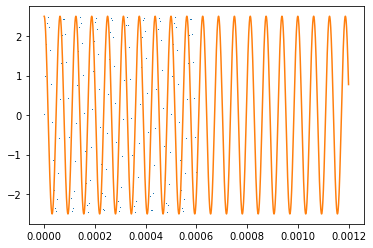

In [393]:
time = np.linspace(0,0.0012,10000)
voltage = V_16_gen_model(time,16000,2.5)

plt.plot(time16,V_gen16,linestyle='None',marker=',')
plt.plot(time,voltage)

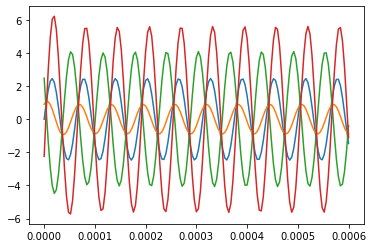

In [394]:
plt.plot(time16,V_gen16)
plt.plot(time16,V_R16)
plt.plot(time16,V_L16)
plt.plot(time16,V_C16)

plt.savefig('../figs/V-t16kHz.pdf')

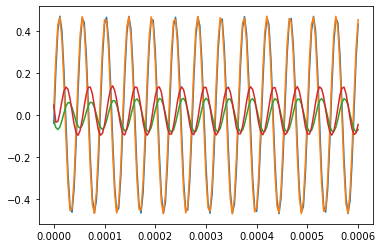

In [395]:
plt.plot(time22,V_gen22)
plt.plot(time22,V_R22)
plt.plot(time22,V_L22)
plt.plot(time22,V_C22)
plt.savefig('../figs/V-t22kHz.pdf')

In [396]:
def L_volt_model(t, f, R, L, C, V_0):
    amp = (2*np.pi*f * L * V_0) / (np.sqrt( R**2 + (2*np.pi*f * L - 1/(2*np.pi*f * C))**2))
    sin = np.cos(2*np.pi*f *t+ np.arctan((1- (2*np.pi*f)**2*L*C)/(R*2*np.pi*f*C)) + np.pi/2)
    return amp*sin
def Gen_volt_model(t, f, V_0):
    amp = V_0
    sin = np.cos(2*np.pi*f*t)
    return amp*sin
def C_volt_model(t,f, R, L, C, V_0):
    amp = (V_0 / (2*np.pi*f * C))/(np.sqrt( R**2 + (2*np.pi*f * L - 1/(2*np.pi*f * C))**2))
    sin = np.cos(2*np.pi*f *t+ np.arctan((1- (2*np.pi*f)**2*L*C)/(R*2*np.pi*f*C)) - np.pi/2)
    return amp*sin

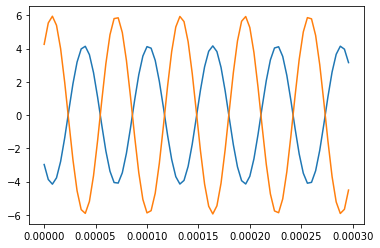

In [397]:
t = np.arange(0,0.00030,4e-6)
f = 16000
R = 2000
L = 0.0474
C = 1.46e-09
V_0 = 2.5
voltL = L_volt_model(t,f,R,L,C,V_0)
voltC = C_volt_model(t,f,R,L,C,V_0)

plt.plot(t,voltL)
plt.plot(t,voltC)

In [398]:
time_fake16 = np.linspace(0.0000,0.0003,200)

VoltGen_16 = Gen_volt_model(time_fake16,f,V_0)
voltL_16 = L_volt_model(time_fake16,f,R,L,C,V_0)
voltC_16 = C_volt_model(time_fake16,f,R,L,C,V_0)
time_fake22 = np.linspace(0.0000,0.0003,200)
VoltGen_22 = Gen_volt_model(time_fake22,22000,V_0)
voltL_22 = L_volt_model(time_fake22,22000,R,L,C,V_0)
voltC_22 = C_volt_model(time_fake22,22000,R,L,C,V_0)

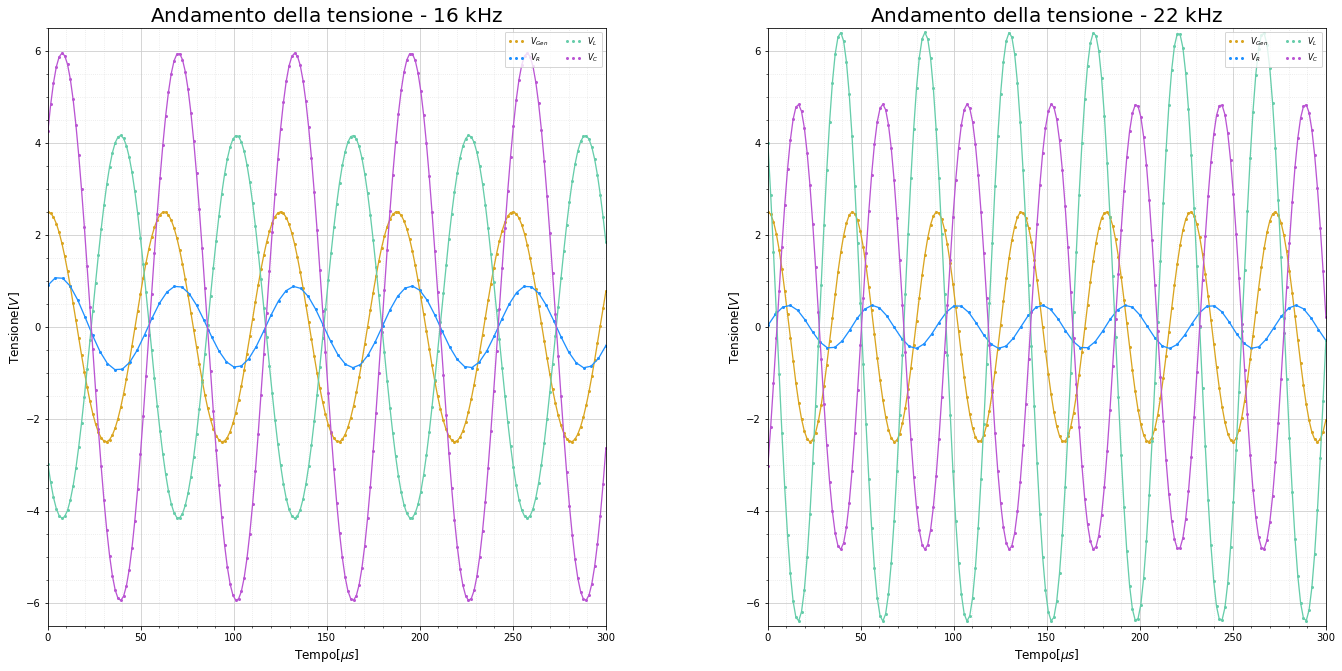

In [399]:
fig = plt.figure(figsize=(20, 11))
titles_size = 25
labels_size = 18
subfigs = fig.subfigures(1, 2, wspace=0.02)
# subfigs[0].suptitle('Andamento della tensione - $16$ kHz', fontsize=titles_size)
# subfigs[1].suptitle('Andamento della tensione - $22$ kHz', fontsize=titles_size)

axsLeft = subfigs[0].subplots(1, 1)
axsRight = subfigs[1].subplots(1, 1)

time22 *= 1e6
time16*= 1e6
time_fake16 *= 1e6
time_fake22 *= 1e6

m0, = axsLeft.plot(time_fake16,VoltGen_16,marker='o',markersize=2,color='goldenrod',linestyle='None')
m1, = axsLeft.plot(time16,V_R16,marker='o',markersize=2,color='dodgerblue',linestyle='None')
m2, = axsLeft.plot(time_fake16,voltL_16,marker='o',markersize=2,color='mediumaquamarine',linestyle='None')
m3, = axsLeft.plot(time_fake16,voltC_16,marker='o',markersize=2,color='mediumorchid',linestyle='None')
l0, = axsLeft.plot(time_fake16,VoltGen_16,color='goldenrod',linestyle='solid',linewidth=1.3)
l1, = axsLeft.plot(time16,V_R16,color='dodgerblue',linestyle='solid',linewidth=1.3)
l2, = axsLeft.plot(time_fake16,voltL_16,color='mediumaquamarine',linestyle='solid',linewidth=1.3)
l3, = axsLeft.plot(time_fake16,voltC_16,color='mediumorchid',linestyle='solid',linewidth=1.3)

axsLeft.set_xlim(0,300)
axsLeft.set_ylim(-6.5,6.5)
axsLeft.set_title(r'Andamento della tensione - $16$ kHz',fontsize=20)
axsLeft.set_xlabel(r'Tempo$[\mu s]$',fontsize=12)
axsLeft.set_ylabel(r'Tensione$[V]$',fontsize=12)
axsLeft.grid(visible=True, which='major', color='0.8', linestyle='-')
axsLeft.grid(visible=True, which='minor', color='gray', linestyle='dotted', alpha=0.2)
axsLeft.minorticks_on()
axsLeft.legend((m0 ,m1,m2,m3), (r'$V_{Gen}$','$V_R$','$V_L$','$V_C$'),ncol=2, loc='upper right', shadow=False,fancybox=True,fontsize=8,handler_map={m0: HandlerLine2D(numpoints=3),m1: HandlerLine2D(numpoints=3),m2: HandlerLine2D(numpoints=3),m3: HandlerLine2D(numpoints=3)})

m0, = axsRight.plot(time_fake22,VoltGen_22,marker='o',markersize=2,color='goldenrod',linestyle='None')
m1_, = axsRight.plot(time22,V_R22,marker='o',markersize=2,color='dodgerblue',linestyle='None')
m2_, = axsRight.plot(time_fake22,voltL_22,marker='o',markersize=2,color='mediumaquamarine',linestyle='None')
m3_, = axsRight.plot(time_fake22,voltC_22,marker='o',markersize=2,color='mediumorchid',linestyle='None')
l0, = axsRight.plot(time_fake22,VoltGen_22,color='goldenrod',linestyle='solid',linewidth=1.3)
l1_, = axsRight.plot(time22,V_R22,color='dodgerblue',linestyle='solid',linewidth=1.3)
l2_, = axsRight.plot(time_fake22,voltL_22,color='mediumaquamarine',linestyle='solid',linewidth=1.3)
l3_, = axsRight.plot(time_fake22,voltC_22,color='mediumorchid',linestyle='solid',linewidth=1.3)

axsRight.set_xlim(0,300)
axsRight.set_ylim(-6.5,6.5)
axsRight.set_title(r'Andamento della tensione - $22$ kHz',fontsize=20)
axsRight.set_xlabel(r'Tempo$[\mu s]$',fontsize=12)
axsRight.set_ylabel(r'Tensione$[V]$',fontsize=12)
axsRight.grid(visible=True, which='major', color='0.8', linestyle='-')
axsRight.grid(visible=True, which='minor', color='gray', linestyle='dotted', alpha=0.2)
axsRight.minorticks_on()
axsRight.legend((m0_ ,m1_,m2_,m3_), (r'$V_{Gen}$','$V_R$','$V_L$','$V_C$'),ncol=2, loc='upper right', shadow=False,fancybox=True,fontsize=8,handler_map={m0_: HandlerLine2D(numpoints=3),m1_: HandlerLine2D(numpoints=3),m2_: HandlerLine2D(numpoints=3),m3_: HandlerLine2D(numpoints=3)})


plt.savefig('../figs/tensione-tempo.pdf')